Instructions

    Use this webpage : Tel Aviv - BBC Weather
    Scrape the Webpage: Use Python libraries like Selenium to interact with the webpage and BeautifulSoup to parse the HTML, Extract relevant data such as dates, numerical values, categories, etc., Organize the scraped data into a structured format.

    Data Analysis with Pandas:
        Load your scraped data into a Pandas DataFrame.
        Clean and preprocess the data if necessary (handling missing values, type conversion, etc.).
        Perform basic analysis, such as calculating averages, totals, or trends over time.

    Data Visualization with Seaborn and Matplotlib:
        Use Seaborn and Matplotlib to create visualizations that provide insights into the data.
        Examples of visualizations can include line plots for trends over time, bar charts for comparing categories, or heatmaps for showing data density.
        Ensure your visualizations are well-labeled with clear titles, axis labels, and legends where appropriate.

    Document Your Findings:
        Create a report summarizing your methodology, analysis, and insights from the visualizations.
        Explain any interesting patterns or insights derived from your data.


# Scrape Web Page

In [1]:
#import
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

In [7]:
import re
import pandas as pd

In [2]:
# Selenium Configuration
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode
options.add_argument("--no-sandbox")  # Bypass OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
driver = webdriver.Chrome(options=options)

In [3]:
url = "https://www.bbc.com/weather/293397"
driver.get(url)

In [5]:
# Find all header tags (h1, h2, h3, etc.)
headers = driver.find_elements("xpath", "//h1 | //h2 | //h3 | //h4 | //h5 | //h6")

# Print the text of each header
for header in headers:
    print(header.tag_name, ":", header.text)

# # Close the browser
# driver.quit()

h2 : Accessibility links
h2 : Search for a location
h4 : 
h1 : Tel Aviv
h2 : Forecast - Tel Aviv
h3 : Day by day forecast
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : Hour by hour forecast
h3 : Environmental Summary
h3 : Sunrise Sunset
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h3 : 
h2 : Outlook forecast map
h2 : Forecast for the Middle East and Africa
h3 : 
h2 : Observations
- Bet Dagan
h2 : Settings
h2 : More Weather
h3 : UK
h3 : About BBC Weather
h3 : Elsewhere
h2 : Explore the BBC


In [6]:

soup = BeautifulSoup(driver.page_source, "html.parser")

# Extract dates from forecasts

dates = [element["aria-label"] for element in soup.find_all("div", class_="wr-day__title wr-js-day-content-title") if element.has_attr("aria-label")]

max_temperatures = [temp.text.split("°")[0] + "°C" for temp in soup.find_all("span", class_="wr-day-temperature__high-value")]
min_temperatures = [temp.text.split("°")[0] + "°C" for temp in soup.find_all("span", class_="wr-day-temperature__low-value")]

conditions = [cond.text.strip() for cond in soup.find_all("div", class_="wr-day__weather-type-description wr-js-day-content-weather-type-description wr-day__content__weather-type-description--opaque")]
# Check if all lists are of the same length
# Closing Selenium
driver.quit()

#  results
print("Dates:", dates)
print("Maximum Temperatures:", max_temperatures)
print("Minimum Temperatures:", min_temperatures)
print("Conditions:", conditions)

Dates: ['Saturday 29th March', 'Sunday 30th March', 'Monday 31st March', 'Tuesday 1st April', 'Wednesday 2nd April', 'Thursday 3rd April', 'Friday 4th April', 'Saturday 5th April', 'Sunday 6th April', 'Monday 7th April', 'Tuesday 8th April', 'Wednesday 9th April', 'Thursday 10th April', 'Friday 11th April']
Maximum Temperatures: ['20°C', '21°C', '26°C', '27°C', '23°C', '22°C', '21°C', '22°C', '22°C', '22°C', '23°C', '23°C', '23°C', '22°C']
Minimum Temperatures: ['13°C', '12°C', '19°C', '15°C', '13°C', '13°C', '13°C', '13°C', '13°C', '13°C', '14°C', '14°C', '14°C', '13°C']
Conditions: ['Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny intervals and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny intervals and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny inte

In [8]:
# Function to extract only the temperature figures
def extract_number(temp):
    if isinstance(temp, str): 
        match = re.search(r'\d+', temp)
        return int(match.group()) if match else None
    return temp 

In [13]:
# Extract numerical values from temperature lists
max_temperatures = [extract_number(temp) for temp in max_temperatures]
min_temperatures = [extract_number(temp) for temp in min_temperatures]

# Verify that all values are numeric
print("Max Temperatures:", max_temperatures)
print("Min Temperatures:", min_temperatures)

# Ensure all lists have the same length
min_length = min(len(dates), len(max_temperatures), len(min_temperatures), len(conditions))

# Trim lists to the minimum length
dates = dates[:min_length]
max_temperatures = max_temperatures[:min_length]
min_temperatures = min_temperatures[:min_length]
conditions = conditions[:min_length]

# Create a DataFrame with the cleaned data
df = pd.DataFrame({
    "Date": dates,
    "Max Temperature (°C)": max_temperatures,
    "Min Temperature (°C)": min_temperatures,
    "Weather Conditions": conditions
})

# Display the data types and the first few rows of the DataFrame
print(df.dtypes)
print(df.head())

Max Temperatures: [20, 21, 26, 27, 23, 22, 21, 22, 22, 22, 23, 23, 23, 22]
Min Temperatures: [13, 12, 19, 15, 13, 13, 13, 13, 13, 13, 14, 14, 14, 13]
Date                    object
Max Temperature (°C)     int64
Min Temperature (°C)     int64
Weather Conditions      object
dtype: object
                  Date  Max Temperature (°C)  Min Temperature (°C)  \
0  Saturday 29th March                    20                    13   
1    Sunday 30th March                    21                    12   
2    Monday 31st March                    26                    19   
3    Tuesday 1st April                    27                    15   
4  Wednesday 2nd April                    23                    13   

                    Weather Conditions  
0            Sunny and a gentle breeze  
1            Sunny and a gentle breeze  
2            Sunny and a gentle breeze  
3  Sunny intervals and a gentle breeze  
4            Sunny and a gentle breeze  


In [15]:
# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Calculate the mean temperature
mean_temp = df["Max Temperature (°C)"].mean()
print(f"Mean Temperature: {mean_temp:.2f}°C")

# Identify the hottest and coldest days
hottest_day = df.loc[df["Max Temperature (°C)"].idxmax()]
coldest_day = df.loc[df["Min Temperature (°C)"].idxmin()]

# Print the results
print("The Hottest Day:\n", hottest_day)
print("The Coldest Day:\n", coldest_day)

Mean Temperature: 22.64°C
The Hottest Day:
 Date                                      Tuesday 1st April
Max Temperature (°C)                                     27
Min Temperature (°C)                                     15
Weather Conditions      Sunny intervals and a gentle breeze
Name: 3, dtype: object
The Coldest Day:
 Date                            Sunday 30th March
Max Temperature (°C)                           21
Min Temperature (°C)                           12
Weather Conditions      Sunny and a gentle breeze
Name: 1, dtype: object


# Visualization

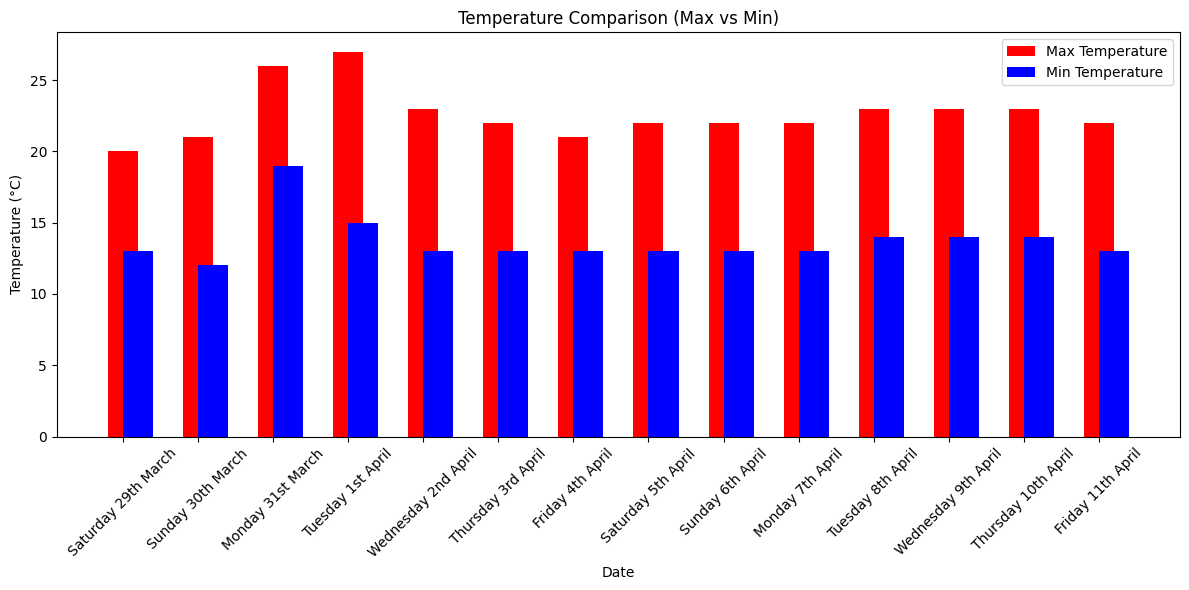

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Create a bar chart for max and min temperatures
plt.figure(figsize=(12, 6))
x = range(len(df["Date"]))  # Numeric x-axis for bar positions

plt.bar(x, df["Max Temperature (°C)"], width=0.4, label="Max Temperature", color="red", align="center")
plt.bar(x, df["Min Temperature (°C)"], width=0.4, label="Min Temperature", color="blue", align="edge")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Comparison (Max vs Min)")
plt.xticks(x, df["Date"], rotation=45)  # Add date labels to x-axis
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

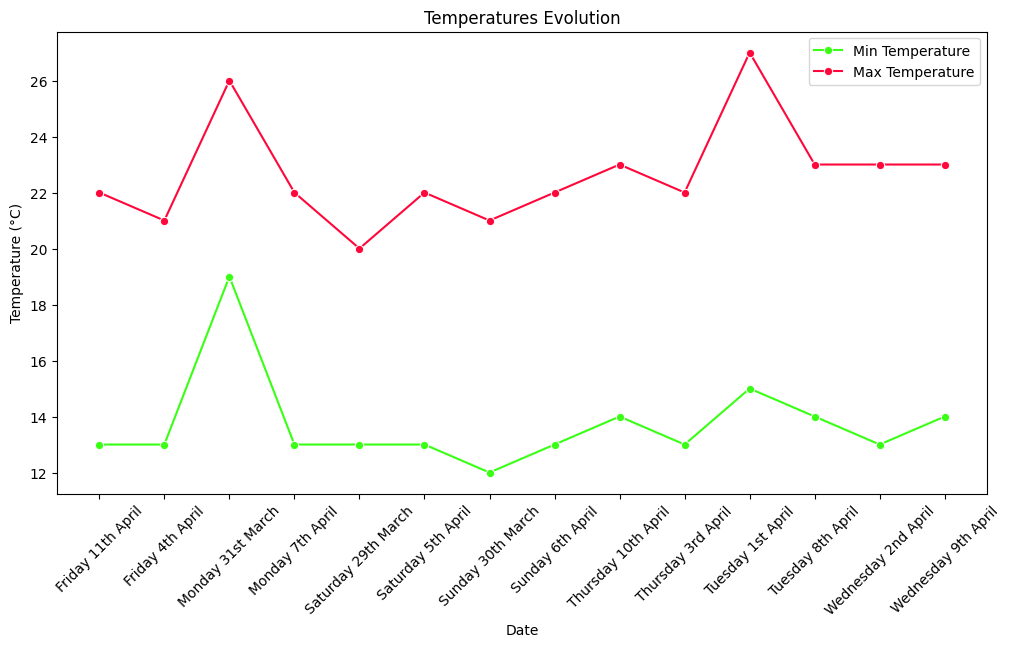

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Sort dates to avoid inverting curves
df = df.sort_values(by="Date")

# Create the Chart
plt.figure(figsize=(12, 6))

# Draw the curves with neon colors
sns.lineplot(x=df["Date"], y=df["Min Temperature (°C)"], label="Min Temperature", marker="o", color="#39FF14")  # Neon green
sns.lineplot(x=df["Date"], y=df["Max Temperature (°C)"], label="Max Temperature", marker="o", color="#FF073A")  # Neon red

# Add titles and captions
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperatures Evolution")
plt.legend()
plt.xticks(rotation=45)

# Chart Display
plt.show()

/var/folders/hz/4wr_d_nj47d_tw5jgy2y69lc0000gn/T/ipykernel_12939/2567728221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Weather Conditions"], order=df["Weather Conditions"].value_counts().index, palette="coolwarm")
/Users/margotiamanova/Desktop/DI-Bootcamp/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


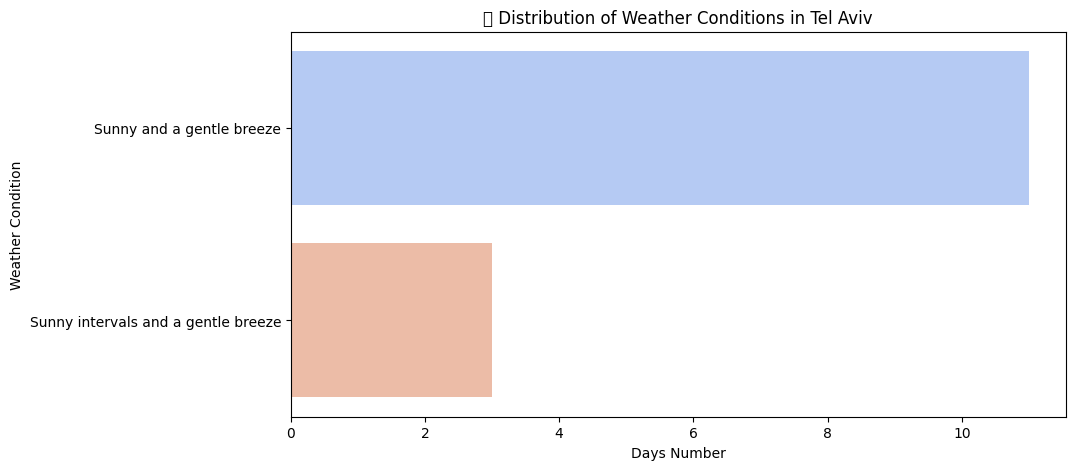

In [20]:
plt.figure(figsize=(10, 5))

# Plot a graph of the frequency of weather conditions
sns.countplot(y=df["Weather Conditions"], order=df["Weather Conditions"].value_counts().index, palette="coolwarm")

# Title and labels
plt.xlabel("Days Number")
plt.ylabel("Weather Condition")
plt.title("🌦️ Distribution of Weather Conditions in Tel Aviv")

# Display
plt.show()

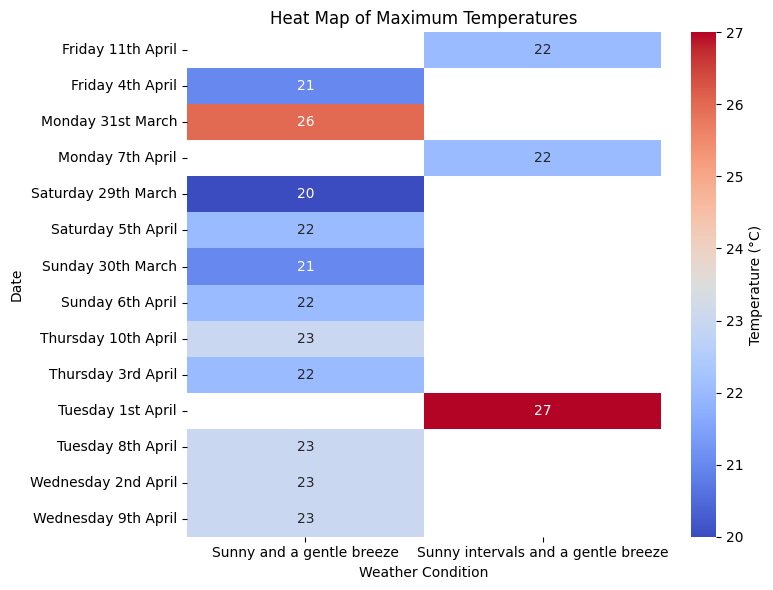

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Create a temperature matrix
temp_matrix = df.pivot(index="Date", columns="Weather Conditions", values="Max Temperature (°C)")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(temp_matrix, cmap="coolwarm", annot=True, fmt=".0f", cbar_kws={'label': 'Temperature (°C)'})

# Title and Labels
plt.title("Heat Map of Maximum Temperatures")
plt.xlabel("Weather Condition")
plt.ylabel("Date")

# Display the heatmap
plt.tight_layout()
plt.show()

# Conclusion

We calculated the average highest temperature to see how hot it usually gets.
We found the hottest day (the day with the highest temperature).
We also found the coldest day (the day with the lowest temperature).


Sunny days are usually hotter, while rainy or cloudy days are cooler.
The charts help us see patterns, like which days were the hottest or coldest.
If some data is missing, it shows as empty spaces in the charts.